In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('pizza1.csv')

In [6]:
df.head(5)

,Age,Weight,Likepizza
0,50,70,0
1,70,50,1
2,50,60,0
3,60,90,1
4,40,40,1


Head:
   age  weight  likePizza
0   50      65          0
1   20      55          1
2   15      40          1
3   70      65          0
4   30      70          1

Shape:
(6, 3)

Columns:
Index(['age', 'weight', 'likePizza'], dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
age          6 non-null int64
weight       6 non-null int64
likePizza    6 non-null int64
dtypes: int64(3)
memory usage: 224.0 bytes
None


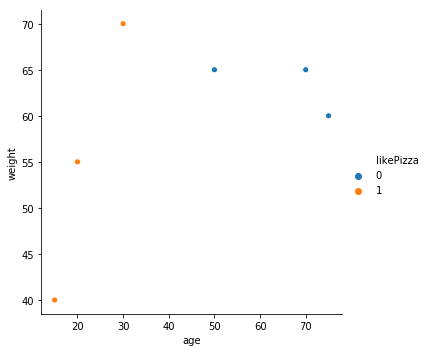

X:
   age  weight
0   50      65
1   20      55
2   15      40
3   70      65
4   30      70
5   75      60

y:
0    0
1    1
2    1
3    0
4    1
5    0
Name: likePizza, dtype: int64

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>
Person 1 Prediction: [1]
Person 2 Prediction: [0]
Person 1 Prediction (k=3): [1]
Person 2 Prediction (k=3): [0]
Predictions on entire dataset: [0 1 1 0 1 0]
Accuracy: 1.0
Test Set Head:
   age  weight  likePizza
0   48      68          1
1   35      45          1
2   15      40          0
3   55      65          0

Test Set Shape:
(4, 3)

Test Set Columns:
Index(['age', 'weight', 'likePizza'], dtype='object')

Test Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
age          4 non-null int64
weight       4 non-null int64
likePizza    4 non-null int64
dtypes: int64(3)
memory usage: 176.0 bytes
None
Test Set Accuracy: 0.5
Scores List: [(1, 0.5), (2, 0

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2. [Import dataset]
df = pd.read_csv("pizza1.csv")

# Print properties
print("Head:")
print(df.head())

print("\nShape:")
print(df.shape)

print("\nColumns:")
print(df.columns)

print("\nInfo:")
print(df.info())

# Step 3. [Visualize Relationships]
sns.relplot(x="age", y="weight", hue="likePizza", data=df)
plt.show()

# Step 4. [Prepare X matrix and y vector]
X = df[['age', 'weight']]
y = df['likePizza']

# Step 5. [Examine X and y]
print("X:")
print(X)

print("\ny:")
print(y)

print("\nType of X:", type(X))
print("Type of y:", type(y))

# Step 6. [Model building]
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X, y)

# Step 7. [Model testing]
person_1_prediction = knn_model.predict([[25, 50]]) # Expecting 1 (YES)
person_2_prediction = knn_model.predict([[60, 60]]) # Expecting 0 (NO)

print("Person 1 Prediction:", person_1_prediction)
print("Person 2 Prediction:", person_2_prediction)

# Step 8. [Change n_neighbors 3]
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X, y)

person_1_prediction_3 = knn_model_3.predict([[25, 50]]) # Expecting 1 (YES)
person_2_prediction_3 = knn_model_3.predict([[60, 60]]) # Expecting 0 (NO)

print("Person 1 Prediction (k=3):", person_1_prediction_3)
print("Person 2 Prediction (k=3):", person_2_prediction_3)

# Step 9. [Predict on entire dataset]
y_pred = knn_model.predict(X)
print("Predictions on entire dataset:", y_pred)

# Step 10. [Accuracy function]
def accuracy(actual, pred):
    return sum(actual == pred) / float(actual.shape[0])

# Step 11. [Find accuracy]
print("Accuracy:", accuracy(y, y_pred))

# Step 12. [Prediction on Test Set]
df_test = pd.read_csv("pizza_test.csv")

print("Test Set Head:")
print(df_test.head())

print("\nTest Set Shape:")
print(df_test.shape)

print("\nTest Set Columns:")
print(df_test.columns)

print("\nTest Set Info:")
print(df_test.info())

X_test = df_test[['age', 'weight']]
y_test = df_test['likePizza']

y_pred_test = knn_model.predict(X_test)

print("Test Set Accuracy:", accuracy(y_test, y_pred_test))

# Step 13. [Find best value for k]
scores = []
for k in range(1, 4):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append((k, accuracy))

print("Scores List:", scores)

# Step 14. [accuracy_score function]
accuracy_test_set = accuracy_score(y_test, y_pred_test)
print("Accuracy Score on Test Set:", accuracy_test_set)
